In [71]:
#Import Dependencies
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARMA, ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch import arch_model
import matplotlib
%matplotlib inline

In [72]:
#Import Csv Sales Promo
sales_df=pd.read_csv("sales_promo_data_19_20.csv", parse_dates=True)

In [73]:
sales_df.head()

,Category,5-Jan-19,12-Jan-19,19-Jan-19,26-Jan-19,2-Feb-19,9-Feb-19,16-Feb-19,23-Feb-19,2-Mar-19,...,27-Jun-20,4-Jul-20,11-Jul-20,18-Jul-20,25-Jul-20,1-Aug-20,8-Aug-20,15-Aug-20,22-Aug-20,29-Aug-20
0,Acne,14969813,15488855,15522357,15054219,14585357,14753443,14809032,15195875,16148805,...,13166113,13221872,13201818,13668104,13509052,13517117,13979460,13920768,13697476,13103453
1,acne_promo,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,Baby,1417338,1515492,1562793,1555259,1638797,1531476,1454065,1658709,1854319,...,1474146,1554193,1565303,1568136,1518454,1478396,1475374,1498834,1514197,1574562
3,baby_promo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bath,55558,59528,56189,56073,60760,61017,60160,67015,74080,...,95631,102159,100110,93145,93047,91177,90298,91522,85806,86022


In [74]:
sales_df=sales_df.rename(columns={"Category":"Date"})

In [75]:
sales_df=sales_df.T

In [76]:
sales_df.columns= sales_df.iloc[0]

In [77]:
sales_df=sales_df.iloc[1:,:]

In [78]:
sales_df.index = pd.to_datetime(sales_df.index)

In [79]:
#Create Separate DataFrames
acne_df= sales_df[["Acne","acne_promo"]].astype('float')
baby_df= sales_df[["Baby","baby_promo"]].astype('float')
bath_df= sales_df[["Bath","bath_promo"]].astype('float')
body_df= sales_df[["Body Wash","body_promo"]].astype('float')
hair_df= sales_df[["Hair","hair_promo"]].astype('float')
lotion_df= sales_df[["Lotion","lotion_promo"]].astype('float')
makeup_df= sales_df[["Makeup","makeup_promo"]].astype('float')
shaving_df= sales_df[["Shaving","shaving_promo"]].astype('float')
sunscreen_df= sales_df[["Sunscreen","sunscreen_promo"]].astype('float')
tanner_df= sales_df[["Tanner","tanner_promo"]].astype('float')

<AxesSubplot:>

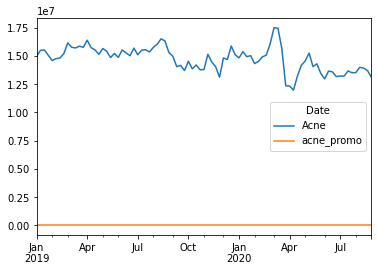

In [80]:
acne_df.plot()

In [81]:
#Decomposing Acne Data
decomp = sm.tsa.seasonal_decompose(acne_df['Acne'],freq=40)
acne_decomp_data = pd.concat([acne_df, decomp.trend, decomp.seasonal, decomp.resid], axis=1)
acne_decomp_data.columns = ['Acne','acne_promo', 'trend', 'seasonal', 'resid']

acne_decomp_data.head()

<ipython-input-81-660f63196b23>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomp = sm.tsa.seasonal_decompose(acne_df['Acne'],freq=40)


,Acne,acne_promo,trend,seasonal,resid
2019-01-05,14969813.0,0.0,NaN,-1.104916e+06,NaN
2019-01-12,15488855.0,0.0,NaN,-8.138378e+05,NaN
2019-01-19,15522357.0,0.0,NaN,-1.297061e+06,NaN
2019-01-26,15054219.0,0.0,NaN,-1.299645e+06,NaN
2019-02-02,14585357.0,0.0,NaN,7.656801e+04,NaN


<AxesSubplot:>

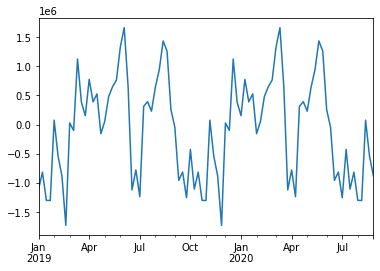

In [82]:
#Seasonality of Acne
acne_decomp_data['seasonal'].plot()

<AxesSubplot:>

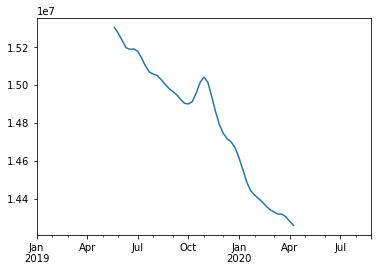

In [83]:
#Trend of Acne Sales
acne_decomp_data['trend'].dropna()
acne_decomp_data['trend'].plot()

<AxesSubplot:>

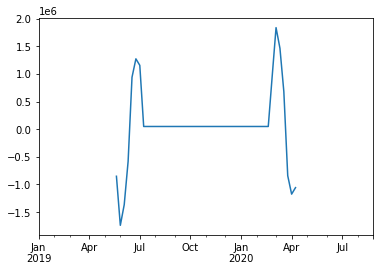

In [84]:
acne_decomp_data['resid'].plot()

In [85]:
#ADFuller Test -Seasonal Data is Stationary Acne
result = adfuller(acne_decomp_data["seasonal"], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -2.4608236256256357
n_lags: 0.1252995928443041
p-value: 0.1252995928443041
Critial Values:
   1%, -3.5219803175527606
Critial Values:
   5%, -2.9014701097664504
Critial Values:
   10%, -2.58807215485756


In [86]:
#Acne Transform to stationary
acne_df['returns']= acne_df['Acne'].pct_change()
acne_df=acne_df.dropna()
acne_df.head()

Date,Acne,acne_promo,returns
2019-01-12,15488855.0,0.0,0.034673
2019-01-19,15522357.0,0.0,0.002163
2019-01-26,15054219.0,0.0,-0.030159
2019-02-02,14585357.0,0.0,-0.031145
2019-02-09,14753443.0,0.0,0.011524


<AxesSubplot:>

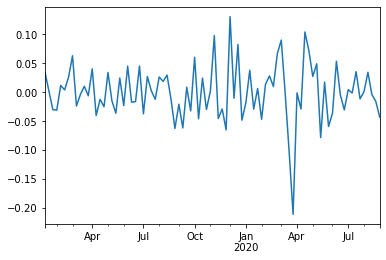

In [87]:
acne_df['returns'].plot()

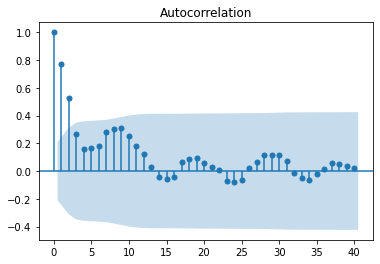

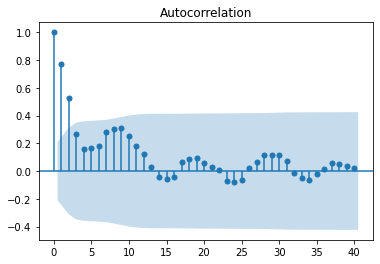

In [88]:
#Acne Autocorrelation
plot_acf(acne_df['Acne'], lags=40)

C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


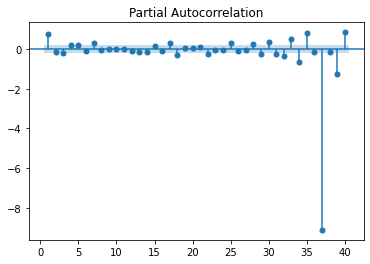

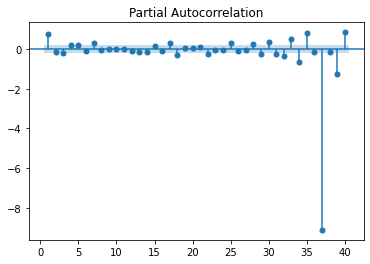

In [192]:
#Acne Partial Autocorrelation
plot_pacf(acne_df['Acne'], zero=False, lags= 40)

In [90]:
#Acne GARCH Model
returns = acne_df.loc['7-Mar-20':'29-Aug-20']['Acne'].pct_change() * 100
returns = returns.dropna()
returns.tail()

2020-08-01    0.059701
2020-08-08    3.420426
2020-08-15   -0.419845
2020-08-22   -1.604021
2020-08-29   -4.336733
Name: Acne, dtype: float64

In [91]:
model = arch_model(returns, mean='Zero', vol='GARCH', p=1, q=1)

In [92]:
res = model.fit(disp='off')

In [93]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                   Acne   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.040
Vol Model:                      GARCH   Log-Likelihood:               -75.5666
Distribution:                  Normal   AIC:                           157.133
Method:            Maximum Likelihood   BIC:                           160.790
                                        No. Observations:                   25
Date:                Wed, Aug 04 2021   Df Residuals:                       25
Time:                        19:59:32   Df Model:                            0
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.0000      1.066      0.000      1.000 [ -2.090,  2.090]
alpha[1]       0.0000  8.194e-02      0.000      1.000 [ -0.161,  0.161]
beta[1]        0.9151      0.164      5.595  2.206e-08 [  0.595,  1.236]
========================================================================

Covariance estimator: robust
"""

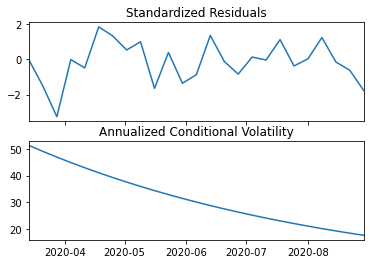

In [94]:
fig = res.plot(annualize='W')

In [95]:
#Acne Future forecast 252 days
forecast_horizon = 252
forecasts = res.forecast(start='29-AUG-20', horizon=forecast_horizon)
forecasts

C:\Users\wilbr\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [96]:
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.243,h.244,h.245,h.246,h.247,h.248,h.249,h.250,h.251,h.252
2020-08-29,37.225051,35.610149,34.065304,32.587479,31.173764,29.82138,28.527665,27.290074,26.106172,24.97363,...,0.000812,0.000777,0.000743,0.000711,0.00068,0.00065,0.000622,0.000595,0.000569,0.000545


In [97]:
final = intermediate.dropna().T
final

,2020-08-29
h.001,37.225051
h.002,35.610149
h.003,34.065304
h.004,32.587479
h.005,31.173764
...,...
h.248,0.000650
h.249,0.000622
h.250,0.000595
h.251,0.000569


<AxesSubplot:>

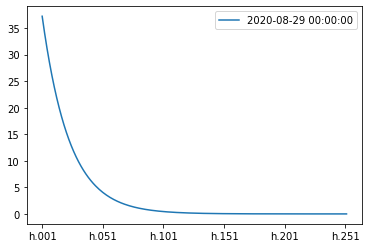

In [98]:
final.plot()

In [99]:
#ACNE SARIMA Model
model=SARIMAX(endog=acne_df['Acne'], order=(2,1,2),
              seasonal_order=(2,1,2,12),
              trend='c',enforce_invertibility=False
             )
acne_results=model.fit()
print(acne_results.summary())

C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  warnings.warn('No frequency information was'
C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                               Acne   No. Observations:                   86
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -1107.735
Date:                            Wed, 04 Aug 2021   AIC                           2235.471
Time:                                    19:59:39   BIC                           2258.376
Sample:                                01-12-2019   HQIC                          2244.599
                                     - 08-29-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1833.3919   1.06e+05      0.017      0.986   -2.05e+05    2.09e+05
ar.L1          1.1324      0.129   

C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


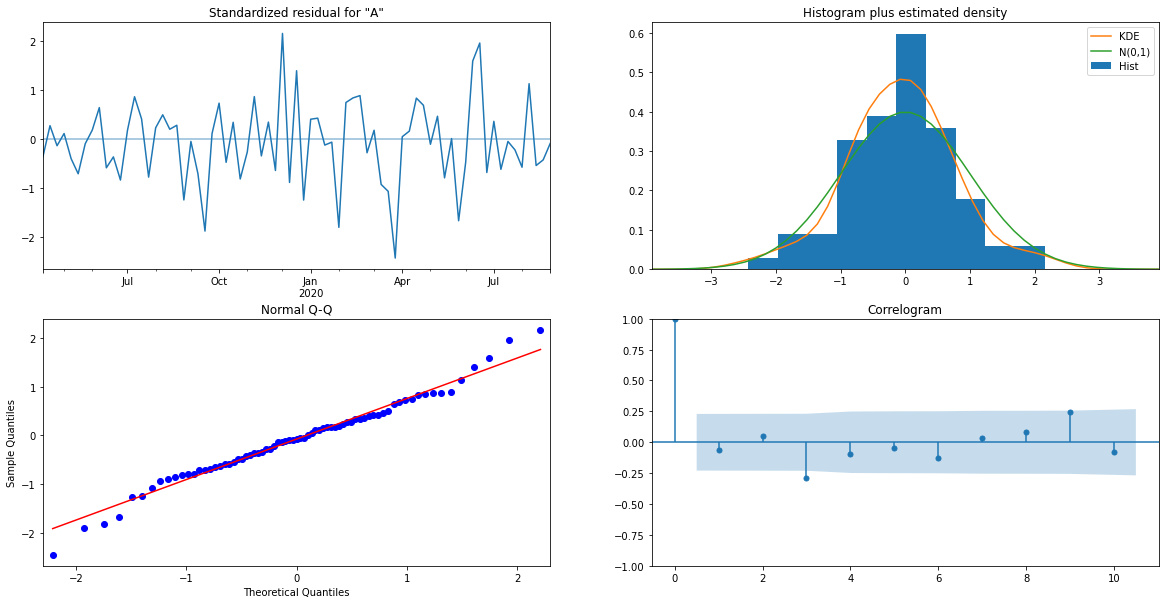

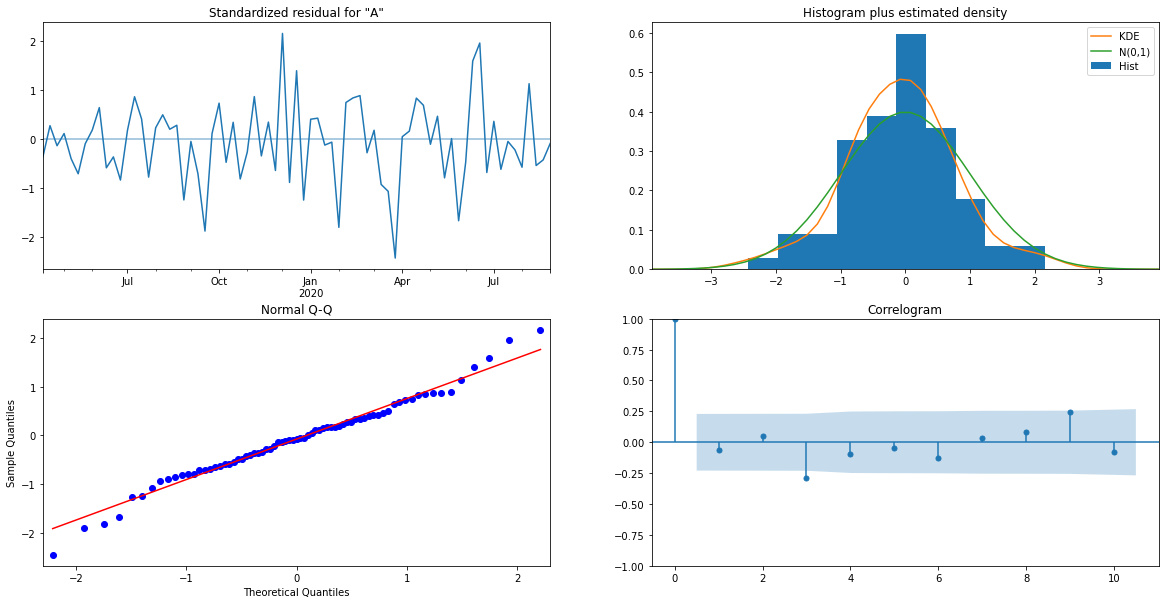

In [100]:
acne_results.plot_diagnostics(figsize=(20,10))

In [187]:
#Acne Arima Model
acne_arima_mod = ARIMA(acne_df["Acne"], order=(2,1,2))

C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SAT

In [188]:
acne_arima_results = acne_arima_mod.fit()

C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:702: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\wilbr\anaconda3\lib\sit

In [189]:
acne_arima_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Acne   No. Observations:                   85
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1258.305
Method:                       css-mle   S.D. of innovations         631743.450
Date:                Wed, 04 Aug 2021   AIC                           2528.610
Time:                        21:18:58   BIC                           2543.266
Sample:                    01-19-2019   HQIC                          2534.505
                         - 08-29-2020                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.608e+04   8427.360     -3.095      0.002   -4.26e+04   -9565.594
ar.L1.D.Acne    -0.1881      0.093     -2.032      0.042      -0.370      -0.007
ar.L2.D.Acne     0.5804      0.093      6.257      0.000       0.399       0.762
ma.L1.D.Acne          0      0.061          0      1.000      -0.119       0.119
ma.L2.D.Acne    -1.0000      0.061    -16.503      0.000      -1.119      -0.881
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1605           +0.0000j            1.1605            0.5000
AR.2            1.4846           +0.0000j            1.4846            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.0000           +0.0000j            1.0000            0.5000
-----------------------------------------------------------------------------
"""

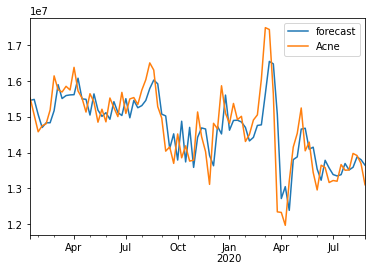

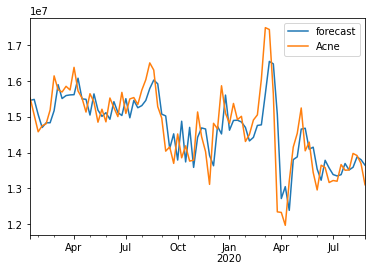

In [191]:
acne_arima_results.plot_predict()

In [101]:
#Lotion Product Sales
lotion_df.head()

Date,Lotion,lotion_promo
2019-01-05,3227827.0,0.0
2019-01-12,3551875.0,0.0
2019-01-19,3435812.0,0.0
2019-01-26,3406859.0,0.0
2019-02-02,3754491.0,0.0


<AxesSubplot:>

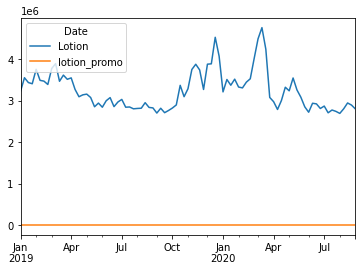

In [102]:
lotion_df.plot()

In [103]:
#Decomposing Lotion Data
decomp = sm.tsa.seasonal_decompose(lotion_df['Lotion'],freq=40)
lotion_decomp_data = pd.concat([lotion_df, decomp.trend, decomp.seasonal, decomp.resid], axis=1)
lotion_decomp_data.columns = ['Lotion','lotion_promo', 'trend', 'seasonal', 'resid']

lotion_decomp_data.head()

<ipython-input-103-20d984d03f67>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomp = sm.tsa.seasonal_decompose(lotion_df['Lotion'],freq=40)


,Lotion,lotion_promo,trend,seasonal,resid
2019-01-05,3227827.0,0.0,NaN,-318665.059219,NaN
2019-01-12,3551875.0,0.0,NaN,119273.878281,NaN
2019-01-19,3435812.0,0.0,NaN,-196895.846719,NaN
2019-01-26,3406859.0,0.0,NaN,-42111.259219,NaN
2019-02-02,3754491.0,0.0,NaN,404872.640781,NaN


<AxesSubplot:>

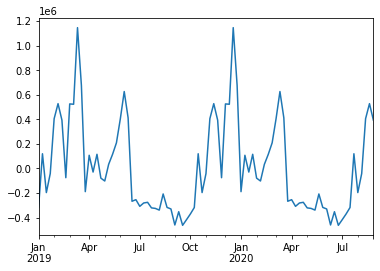

In [104]:
lotion_decomp_data['seasonal'].plot()

<AxesSubplot:>

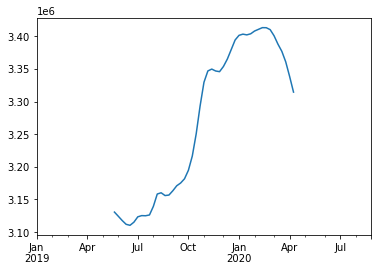

In [105]:
lotion_decomp_data['trend'].plot()

<AxesSubplot:>

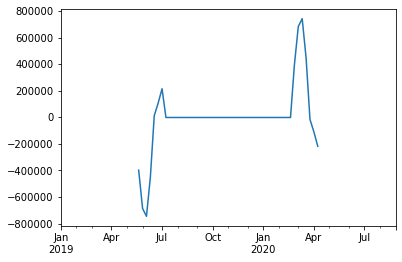

In [106]:
lotion_decomp_data['resid'].plot()

In [107]:
lotion_noise, lotion_trend = sm.tsa.filters.hpfilter(lotion_df['Lotion'])

<AxesSubplot:>

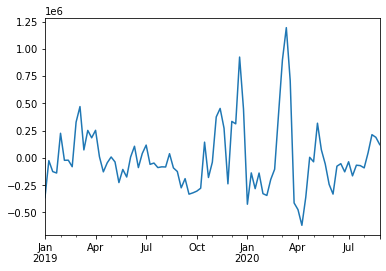

In [108]:
lotion_noise.plot()

<AxesSubplot:>

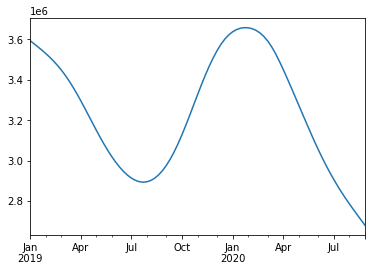

In [109]:
lotion_trend.plot()

In [110]:
#ADFuller Test -Seasonal Data is Stationary
result = adfuller(lotion_decomp_data["seasonal"], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -3.8250431208140463
n_lags: 0.0026612364560095678
p-value: 0.0026612364560095678
Critial Values:
   1%, -3.5087828609430614
Critial Values:
   5%, -2.895783561573195
Critial Values:
   10%, -2.5850381719848565


In [111]:
# Transform Lotion data to stationary
lotion_df['returns']= lotion_df['Lotion'].pct_change()
lotion_df=lotion_df.dropna()
lotion_df.head()

Date,Lotion,lotion_promo,returns
2019-01-12,3551875.0,0.0,0.100392
2019-01-19,3435812.0,0.0,-0.032677
2019-01-26,3406859.0,0.0,-0.008427
2019-02-02,3754491.0,0.0,0.102039
2019-02-09,3488703.0,0.0,-0.070792


<AxesSubplot:>

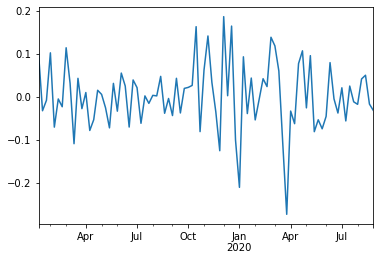

In [112]:
lotion_df['returns'].plot()

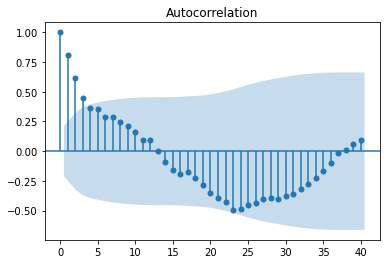

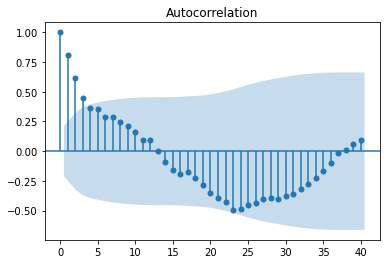

In [113]:
plot_acf(lotion_df['Lotion'], lags=40)

C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


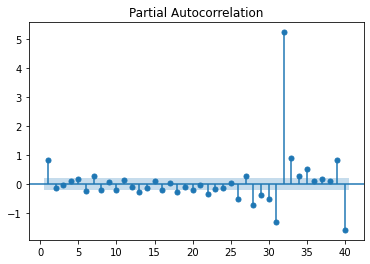

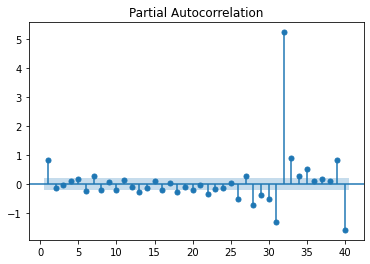

In [114]:
plot_pacf(lotion_df['Lotion'], zero=False, lags= 40)

In [115]:
#Lotion Garch Model
lotion_returns = lotion_df.loc['7-Mar-20':'29-Aug-20']['Lotion'].pct_change() * 100
lotion_returns = lotion_returns.dropna()
lotion_returns.tail()

2020-08-01   -1.777311
2020-08-08    4.128402
2020-08-15    4.991345
2020-08-22   -1.714548
2020-08-29   -3.216952
Name: Lotion, dtype: float64

In [116]:
lotion_model = arch_model(lotion_returns, mean='Zero', vol='GARCH', p=1, q=1)

In [117]:
lotion_res = lotion_model.fit(disp='off')

In [118]:
lotion_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                 Lotion   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.040
Vol Model:                      GARCH   Log-Likelihood:               -82.4111
Distribution:                  Normal   AIC:                           170.822
Method:            Maximum Likelihood   BIC:                           174.479
                                        No. Observations:                   25
Date:                Wed, Aug 04 2021   Df Residuals:                       25
Time:                        19:59:45   Df Model:                            0
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega      1.0361e-11      3.558  2.912e-12      1.000 [ -6.974,  6.974]
alpha[1]       0.0000      0.157      0.000      1.000 [ -0.307,  0.307]
beta[1]        0.9189      0.314      2.931  3.381e-03 [  0.304,  1.533]
========================================================================

Covariance estimator: robust
"""

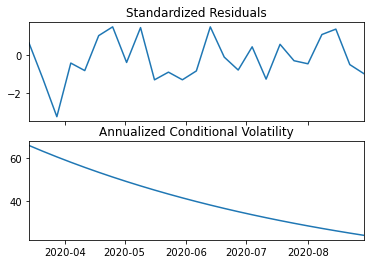

In [119]:
#Lotion Sales Volatility
lotion_fig = lotion_res.plot(annualize='W')

In [120]:
forecast_horizon = 252
lotion_forecasts = lotion_res.forecast(start='29-AUG-20', horizon=forecast_horizon)
lotion_forecasts

C:\Users\wilbr\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [121]:
lotion_intermediate = np.sqrt(lotion_forecasts.variance.dropna() * 252)
lotion_intermediate.head()

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.243,h.244,h.245,h.246,h.247,h.248,h.249,h.250,h.251,h.252
2020-08-29,50.300722,48.218005,46.221523,44.307707,42.473132,40.714519,39.028722,37.412725,35.86364,34.378695,...,0.001817,0.001743,0.001671,0.001603,0.001537,0.001475,0.001414,0.001357,0.001302,0.001249


In [122]:
lotion_final = lotion_intermediate.dropna().T
lotion_final

,2020-08-29
h.001,50.300722
h.002,48.218005
h.003,46.221523
h.004,44.307707
h.005,42.473132
...,...
h.248,0.001475
h.249,0.001414
h.250,0.001357
h.251,0.001302


<AxesSubplot:>

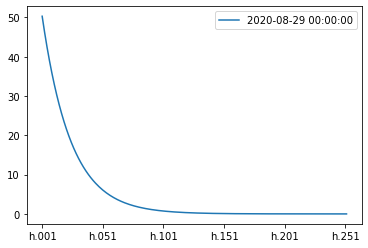

In [123]:
lotion_final.plot()

In [124]:
#Lotion SARIMA Model
lotion_sar_model=SARIMAX(endog=baby_df['Baby'], order=(2,1,2),
              seasonal_order=(2,1,2,12),
              trend='c',enforce_invertibility=False
             )
lotion_results=lotion_sar_model.fit()
print(lotion_results.summary())

C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  warnings.warn('No frequency information was'
C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  warnings.warn('No frequency information was'
C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:901: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:] ** 2).mean()
C:\Users\wilbr\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


                                     SARIMAX Results                                      
Dep. Variable:                               Baby   No. Observations:                   87
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -1000.071
Date:                            Wed, 04 Aug 2021   AIC                           2020.142
Time:                                    19:59:50   BIC                           2043.183
Sample:                                01-05-2019   HQIC                          2029.333
                                     - 08-29-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -2107.0887   1.09e+04     -0.193      0.847   -2.35e+04    1.93e+04
ar.L1          1.4012      0.310   

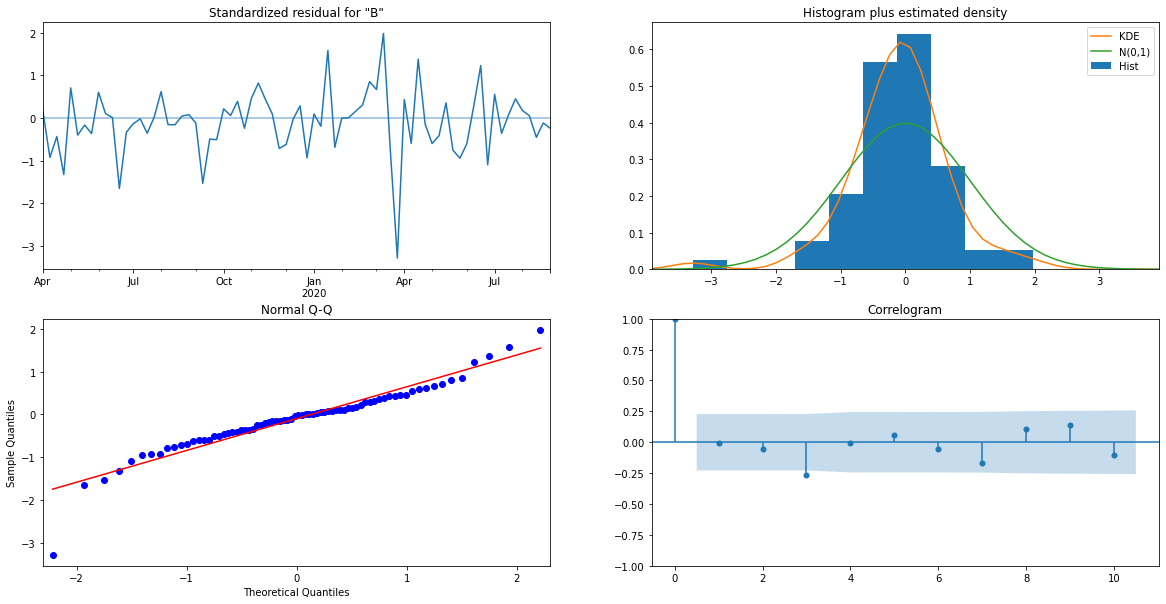

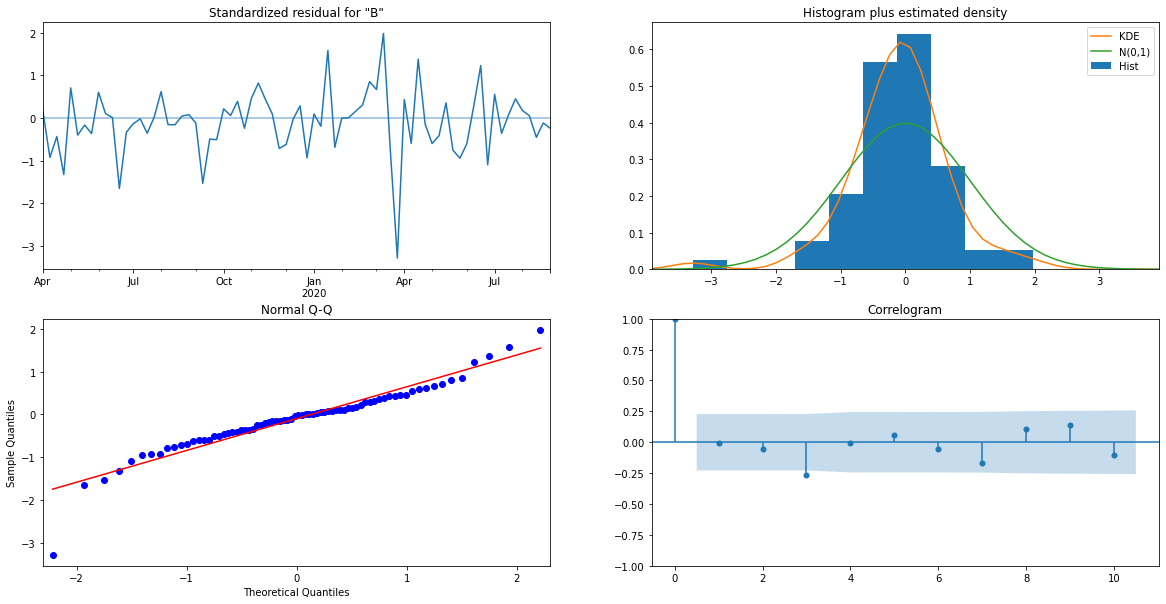

In [125]:
lotion_results.plot_diagnostics(figsize=(20,10))

In [126]:
#Lotion ARIMA Model
lotion_arima_mod = ARIMA(lotion_df["Lotion"], order=(2,1,2))

C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SAT

In [127]:
lotion_arima_results = lotion_arima_mod.fit()

C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarni

In [128]:
lotion_arima_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Lotion   No. Observations:                   85
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1179.899
Method:                       css-mle   S.D. of innovations         254328.250
Date:                Wed, 04 Aug 2021   AIC                           2371.798
Time:                        19:59:52   BIC                           2386.454
Sample:                    01-19-2019   HQIC                          2377.694
                         - 08-29-2020                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3774.8646   5448.116     -0.693      0.488   -1.45e+04    6903.247
ar.L1.D.Lotion     0.0562      0.110      0.511      0.609      -0.159       0.272
ar.L2.D.Lotion     0.6031      0.108      5.577      0.000       0.391       0.815
ma.L1.D.Lotion    -0.0753      0.063     -1.200      0.230      -0.198       0.048
ma.L2.D.Lotion    -0.9247      0.061    -15.122      0.000      -1.045      -0.805
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2419           +0.0000j            1.2419            0.0000
AR.2           -1.3350           +0.0000j            1.3350            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.0814           +0.0000j            1.0814            0.5000
-----------------------------------------------------------------------------
"""

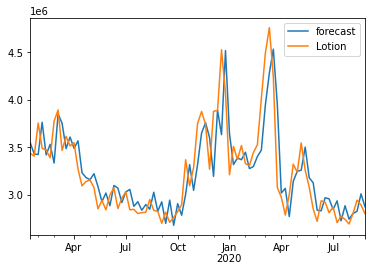

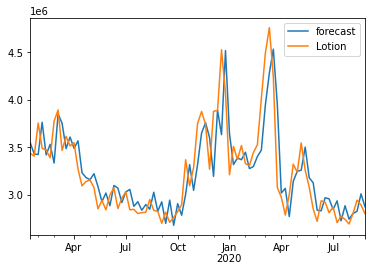

In [129]:
#Lotion Future Forecast Predict ARIMA
lotion_arima_results.plot_predict()

In [130]:
#Makeup Product Sales
makeup_df

Date,Makeup,makeup_promo
2019-01-05,7156661.0,0.0
2019-01-12,7188663.0,0.0
2019-01-19,7173238.0,0.0
2019-01-26,6851425.0,0.0
2019-02-02,6745738.0,0.0
...,...,...
2020-08-01,5422756.0,1.0
2020-08-08,5647887.0,1.0
2020-08-15,5619787.0,1.0
2020-08-22,5622940.0,1.0


In [131]:
makeup_df.dropna(inplace=True)

In [134]:
#Decomposing Makeup Data
decomp = sm.tsa.seasonal_decompose(makeup_df['Makeup'],freq=40)
makeup_decomp_data = pd.concat([makeup_df, decomp.trend, decomp.seasonal, decomp.resid], axis=1)
makeup_decomp_data.columns = ['Makeup','makeup_promo', 'trend', 'seasonal', 'resid']


<ipython-input-134-45636d54e65f>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomp = sm.tsa.seasonal_decompose(makeup_df['Makeup'],freq=40)


In [135]:
makeup_decomp_data.head()

,Makeup,makeup_promo,trend,seasonal,resid
2019-01-05,7156661.0,0.0,NaN,-397333.866406,NaN
2019-01-12,7188663.0,0.0,NaN,-352499.741406,NaN
2019-01-19,7173238.0,0.0,NaN,-314075.978906,NaN
2019-01-26,6851425.0,0.0,NaN,-184717.816406,NaN
2019-02-02,6745738.0,0.0,NaN,-44181.741406,NaN


<AxesSubplot:>

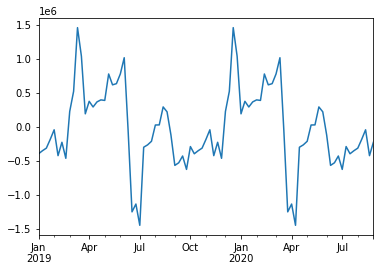

In [136]:
makeup_decomp_data['seasonal'].plot()

<AxesSubplot:>

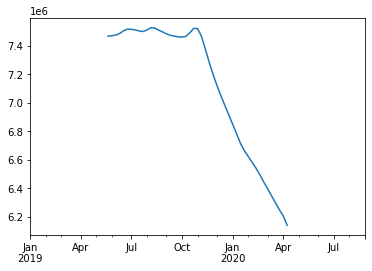

In [137]:
makeup_decomp_data['trend'].plot()

<AxesSubplot:>

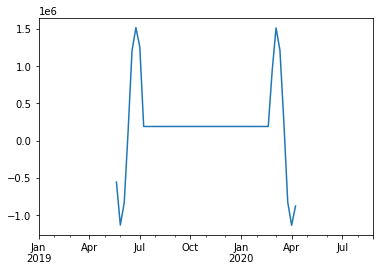

In [138]:
makeup_decomp_data['resid'].plot()

In [139]:
#Makeup Noise and Trend
makeup_noise, makeup_trend = sm.tsa.filters.hpfilter(makeup_df['Makeup'])

<AxesSubplot:>

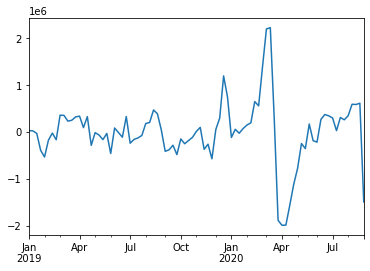

In [140]:
makeup_noise.plot()

<AxesSubplot:>

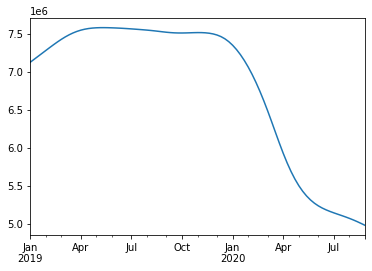

In [141]:
makeup_trend.plot()

In [142]:
#ADFuller Test -Seasonal Data is Stationary Makeup Seasonal Data
result = adfuller(makeup_decomp_data["seasonal"], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -3.3405022335762635
n_lags: 0.013162286878336982
p-value: 0.013162286878336982
Critial Values:
   1%, -3.5219803175527606
Critial Values:
   5%, -2.9014701097664504
Critial Values:
   10%, -2.58807215485756


In [163]:
#Transform Makeup Data into Stationary Data
makeup_df['returns']= makeup_df['Makeup'].pct_change()
makeup_df=makeup_df.dropna()
makeup_df.head()

Date,Makeup,makeup_promo,returns
2019-01-12,7188663.0,0.0,0.004472
2019-01-19,7173238.0,0.0,-0.002146
2019-01-26,6851425.0,0.0,-0.044863
2019-02-02,6745738.0,0.0,-0.015426
2019-02-09,7142905.0,0.0,0.058877


<AxesSubplot:>

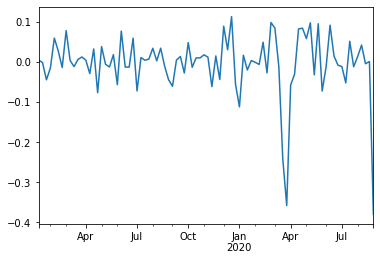

In [164]:
makeup_df['returns'].plot()

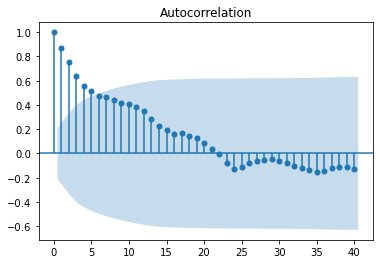

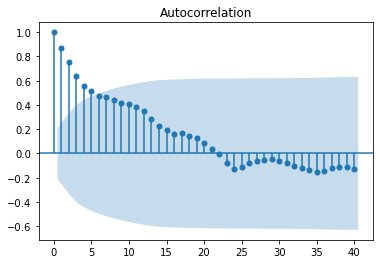

In [145]:
#Makeup Autocorrelation
plot_acf(makeup_df['Makeup'], lags=40)

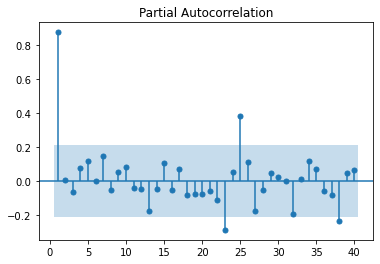

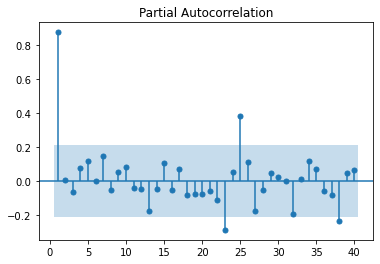

In [146]:
plot_pacf(makeup_df['Makeup'], zero=False, lags=40)

In [147]:
#Makeup Garch Results
makeup_garch_returns = makeup_df.loc['7-Mar-20':'29-Aug-20']['Makeup'].pct_change() * 100
makeup_garch_returns = makeup_garch_returns.dropna()
makeup_garch_returns.tail()

2020-08-01     1.269370
2020-08-08     4.151597
2020-08-15    -0.497531
2020-08-22     0.056105
2020-08-29   -37.965744
Name: Makeup, dtype: float64

In [148]:
model = arch_model(makeup_garch_returns, mean='Zero', vol='GARCH', p=1, q=1)

In [149]:
res = model.fit(disp='off')

In [150]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                 Makeup   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.040
Vol Model:                      GARCH   Log-Likelihood:               -97.8106
Distribution:                  Normal   AIC:                           201.621
Method:            Maximum Likelihood   BIC:                           205.278
                                        No. Observations:                   25
Date:                Wed, Aug 04 2021   Df Residuals:                       25
Time:                        20:00:12   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega        125.5459    125.633      0.999      0.318 [-1.207e+02,3.718e+02]
alpha[1]       0.2833      0.275      1.031      0.302      [ -0.255,  0.822]
beta[1]        0.0000      0.685      0.000      1.000      [ -1.342,  1.342]
=============================================================================

Covariance estimator: robust
"""

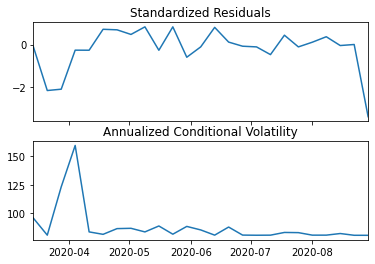

In [151]:
#Makeup Sales Volatility
fig = res.plot(annualize='W')

In [152]:
forecast_horizon = 252
forecasts = res.forecast(start='29-AUG-20', horizon=forecast_horizon)
forecasts

C:\Users\wilbr\anaconda3\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [201]:
intermediate = np.sqrt(forecasts.variance.dropna() * 52)
intermediate.head()

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.243,h.244,h.245,h.246,h.247,h.248,h.249,h.250,h.251,h.252
2020-08-29,166.617263,119.96972,102.983609,97.636032,96.067054,95.617908,95.490288,95.454104,95.443851,95.440946,...,95.439798,95.439798,95.439798,95.439798,95.439798,95.439798,95.439798,95.439798,95.439798,95.439798


In [202]:
final = intermediate.dropna().T
final

,2020-08-29
h.001,166.617263
h.002,119.969720
h.003,102.983609
h.004,97.636032
h.005,96.067054
...,...
h.248,95.439798
h.249,95.439798
h.250,95.439798
h.251,95.439798


<AxesSubplot:>

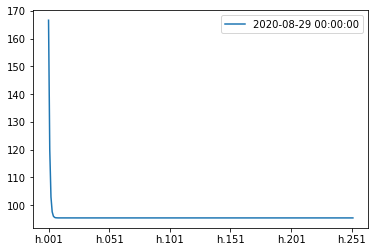

In [203]:
final.plot()

In [156]:
#SARIMA Analysis
model=SARIMAX(endog=makeup_df['Makeup'], order=(2,1,2),
              seasonal_order=(2,1,2,12),
              trend='c',enforce_invertibility=False
             )
makeup_results=model.fit()
print(makeup_results.summary())

C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  warnings.warn('No frequency information was'
C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  warnings.warn('No frequency information was'
C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:901: RuntimeWarning: Mean of empty slice.
  params_variance = (residuals[k_params_ma:] ** 2).mean()
C:\Users\wilbr\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:996: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationa

                                     SARIMAX Results                                      
Dep. Variable:                             Makeup   No. Observations:                   87
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -1084.346
Date:                            Wed, 04 Aug 2021   AIC                           2188.692
Time:                                    20:00:18   BIC                           2211.733
Sample:                                01-05-2019   HQIC                          2197.883
                                     - 08-29-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -2.744e+04   3.75e+04     -0.732      0.464   -1.01e+05     4.6e+04
ar.L1          1.2518      0.078   

C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


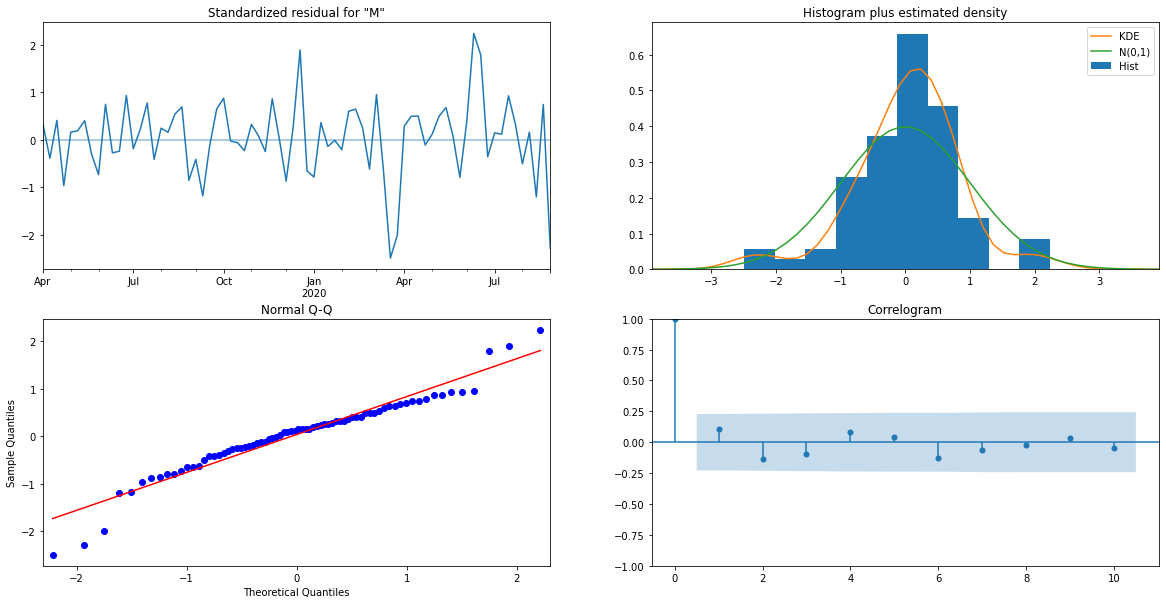

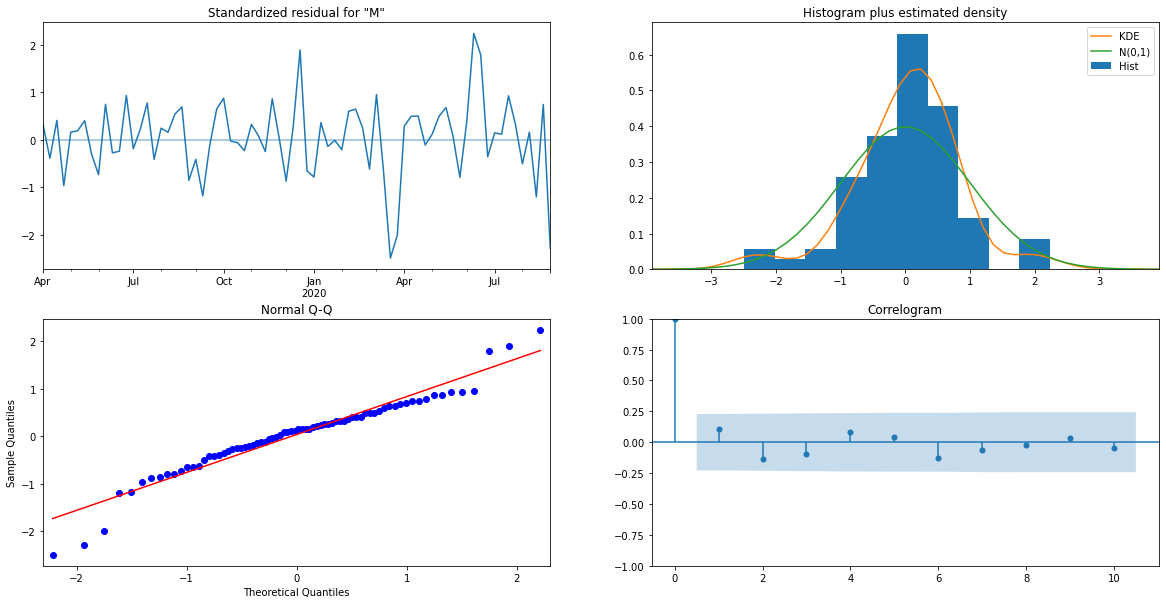

In [168]:
#Makeup SARIMA Diagnostic
makeup_results.plot_diagnostics(figsize=(20,10))

In [199]:
#Makeup ARIMA model
makeup_model = ARIMA(makeup_df['Makeup'].values, order=(2, 1, 2))
makeup_results = makeup_model.fit()
makeup_results.summary()

C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\wilbr\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   85
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1232.408
Method:                       css-mle   S.D. of innovations         466842.910
Date:                Wed, 04 Aug 2021   AIC                           2476.816
Time:                        21:28:33   BIC                           2491.472
Sample:                             1   HQIC                          2482.711
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.354e+04   6.17e+04     -0.705      0.481   -1.65e+05    7.75e+04
ar.L1.D.y     -0.8066      0.112     -7.213      0.000      -1.026      -0.587
ar.L2.D.y     -0.6786      0.089     -7.649      0.000      -0.852      -0.505
ma.L1.D.y      1.0343      0.066     15.589      0.000       0.904       1.164
ma.L2.D.y      0.9999      0.095     10.478      0.000       0.813       1.187
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.5943           -1.0585j            1.2139           -0.3314
AR.2           -0.5943           +1.0585j            1.2139            0.3314
MA.1           -0.5172           -0.8559j            1.0001           -0.3365
MA.2           -0.5172           +0.8559j            1.0001            0.3365
-----------------------------------------------------------------------------
"""

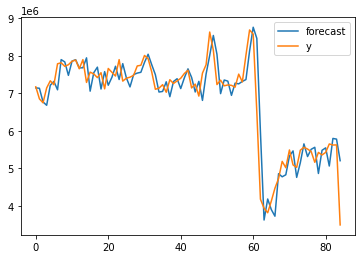

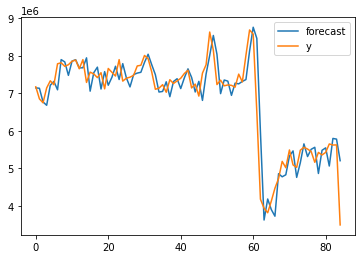

In [200]:
#Makeup Future Predict
makeup_results.plot_predict()